**Author: Nikhil Anand**

**ANALYSIS OF AIR QUALITY IN INDIA**

Dataset : https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data/code

In [49]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
df=pd.read_csv('/Users/nikhil/Desktop/CaseStudy/data.csv',encoding='unicode_escape')
# Reading the dataset

## Data Understanding

In [51]:
# Loading the dataset
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [52]:
df.shape

(435742, 13)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [54]:
# Checking for missing values present in the dataset
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [55]:
# Checking the descriptive stats of the numeric values present in the data 
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [56]:
# These are all the unique values present in the dataframe
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [57]:
# These are all the columns present in the dataset
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code)
sampling_date (date of sample collection)
state (Indian State)
location (location of sample collection)
agency
type (type of area)
so2 (sulphur dioxide concentration)
no2 (nitrogen dioxide concentration)
rspm (respirable suspended particualte matter concentration)
spm (suspended particulate matter)
location_monitoring_station
pm2_5 (particulate matter 2.5)
date (date)

## Data Visualization

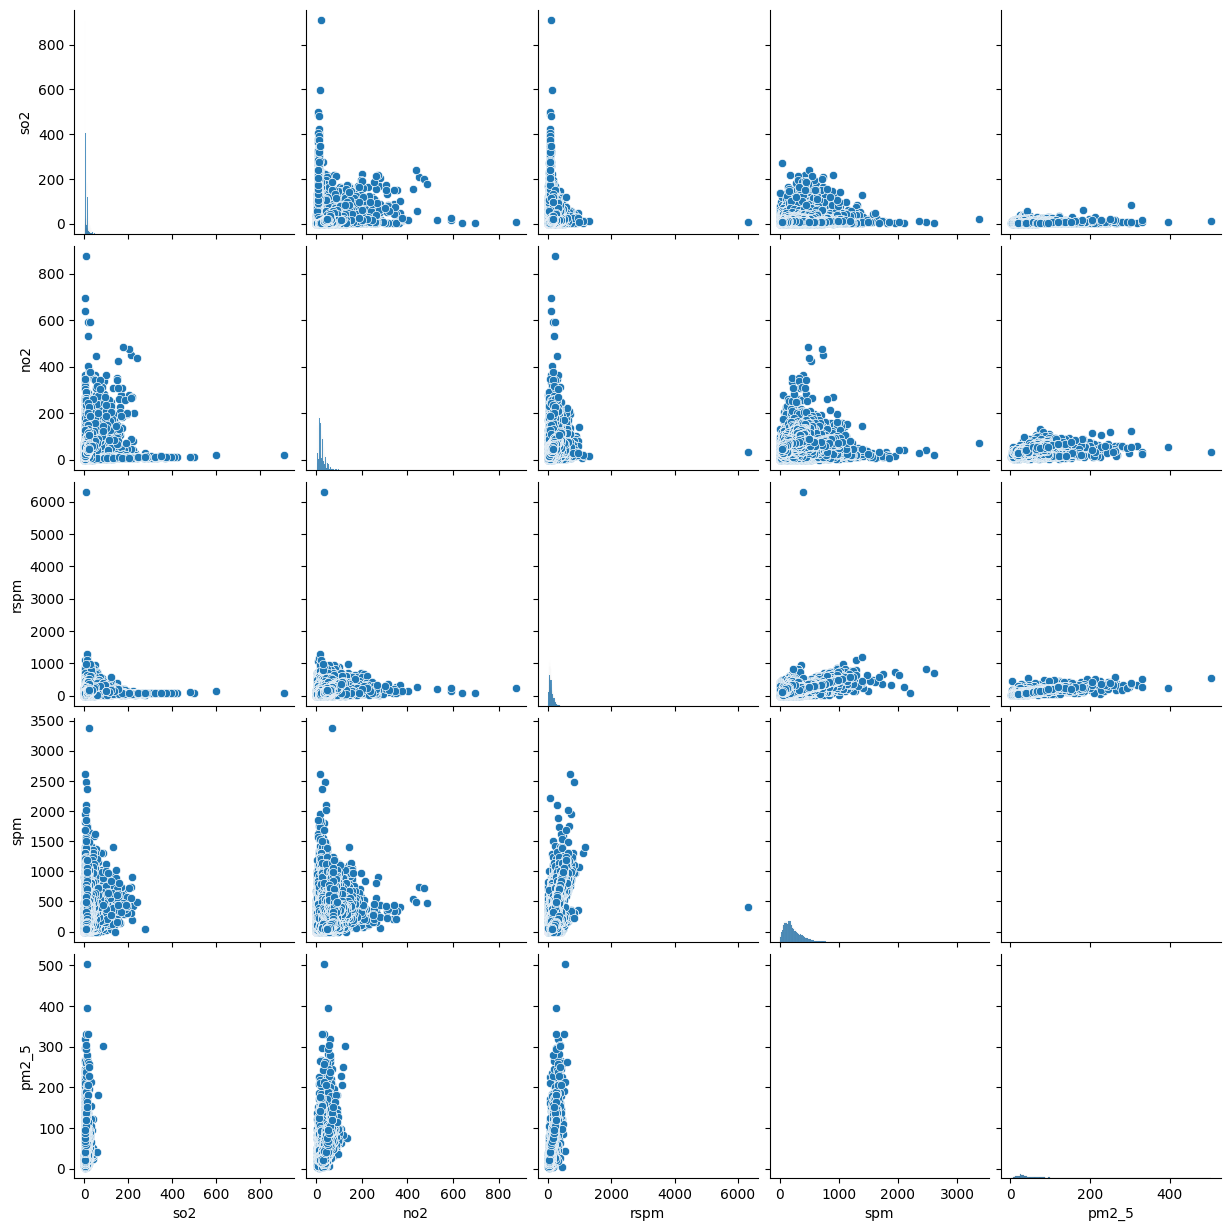

In [58]:
sns.pairplot(data=df)

In [59]:
# Viewing the count of values present in the state column
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

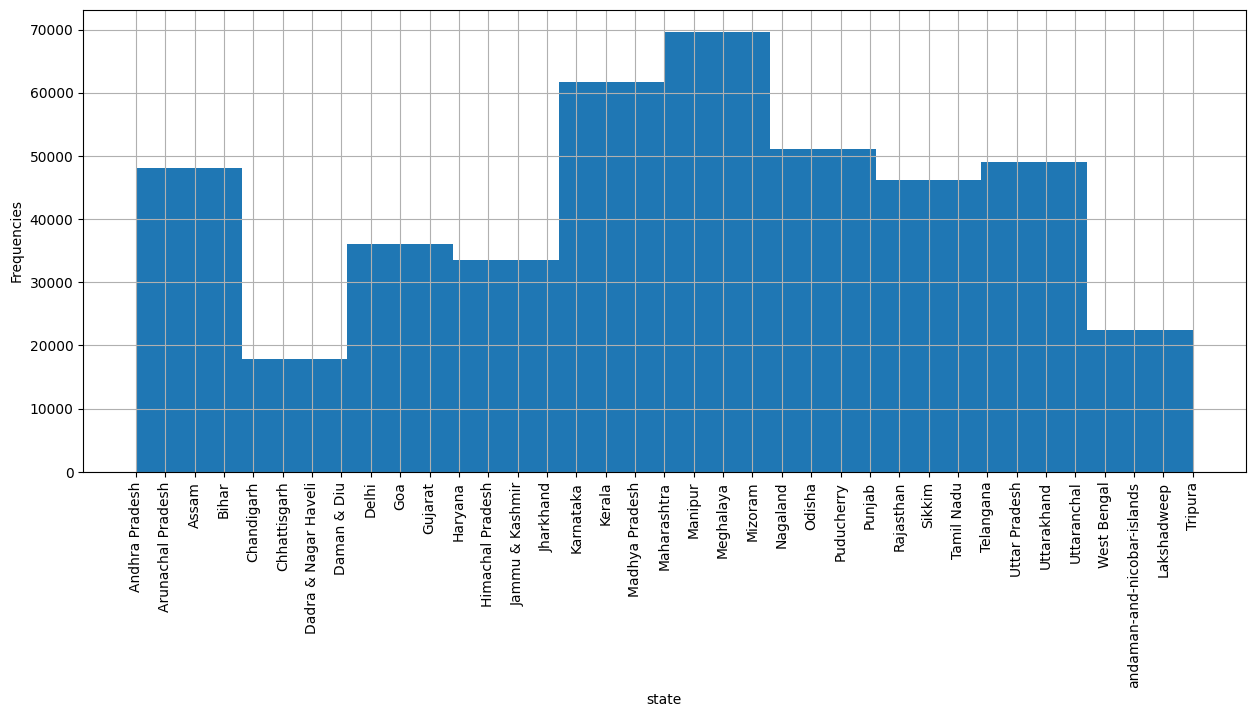

In [60]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

The visualization shows us the count of states present in the dataset

In [61]:
# Viewing the count of values present in the type column
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

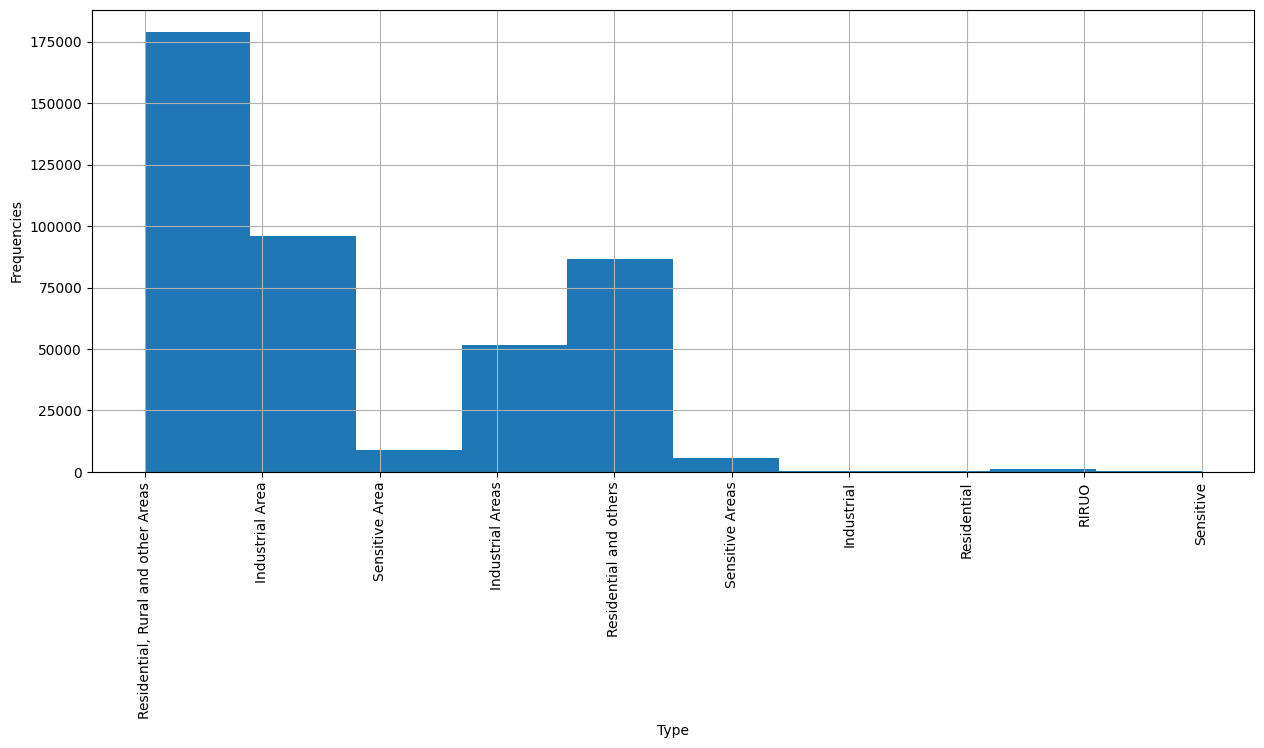

In [62]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

The visualization shows us the count of Types present in the dataset

In [63]:
# Viewing the counts of values present in the agency column
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

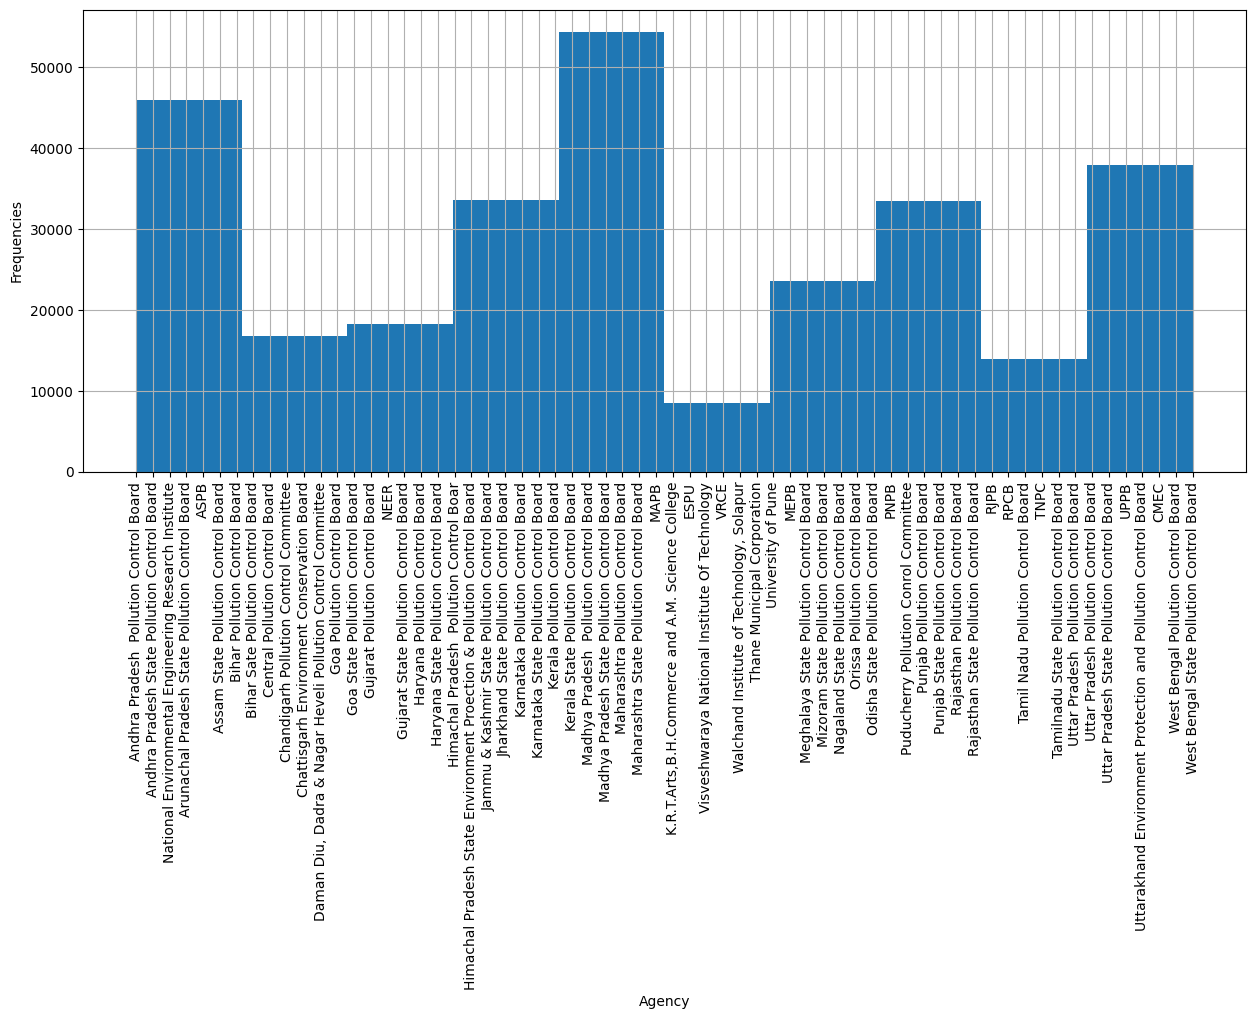

In [64]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

The visualization shows us the count of Agency present in the dataset

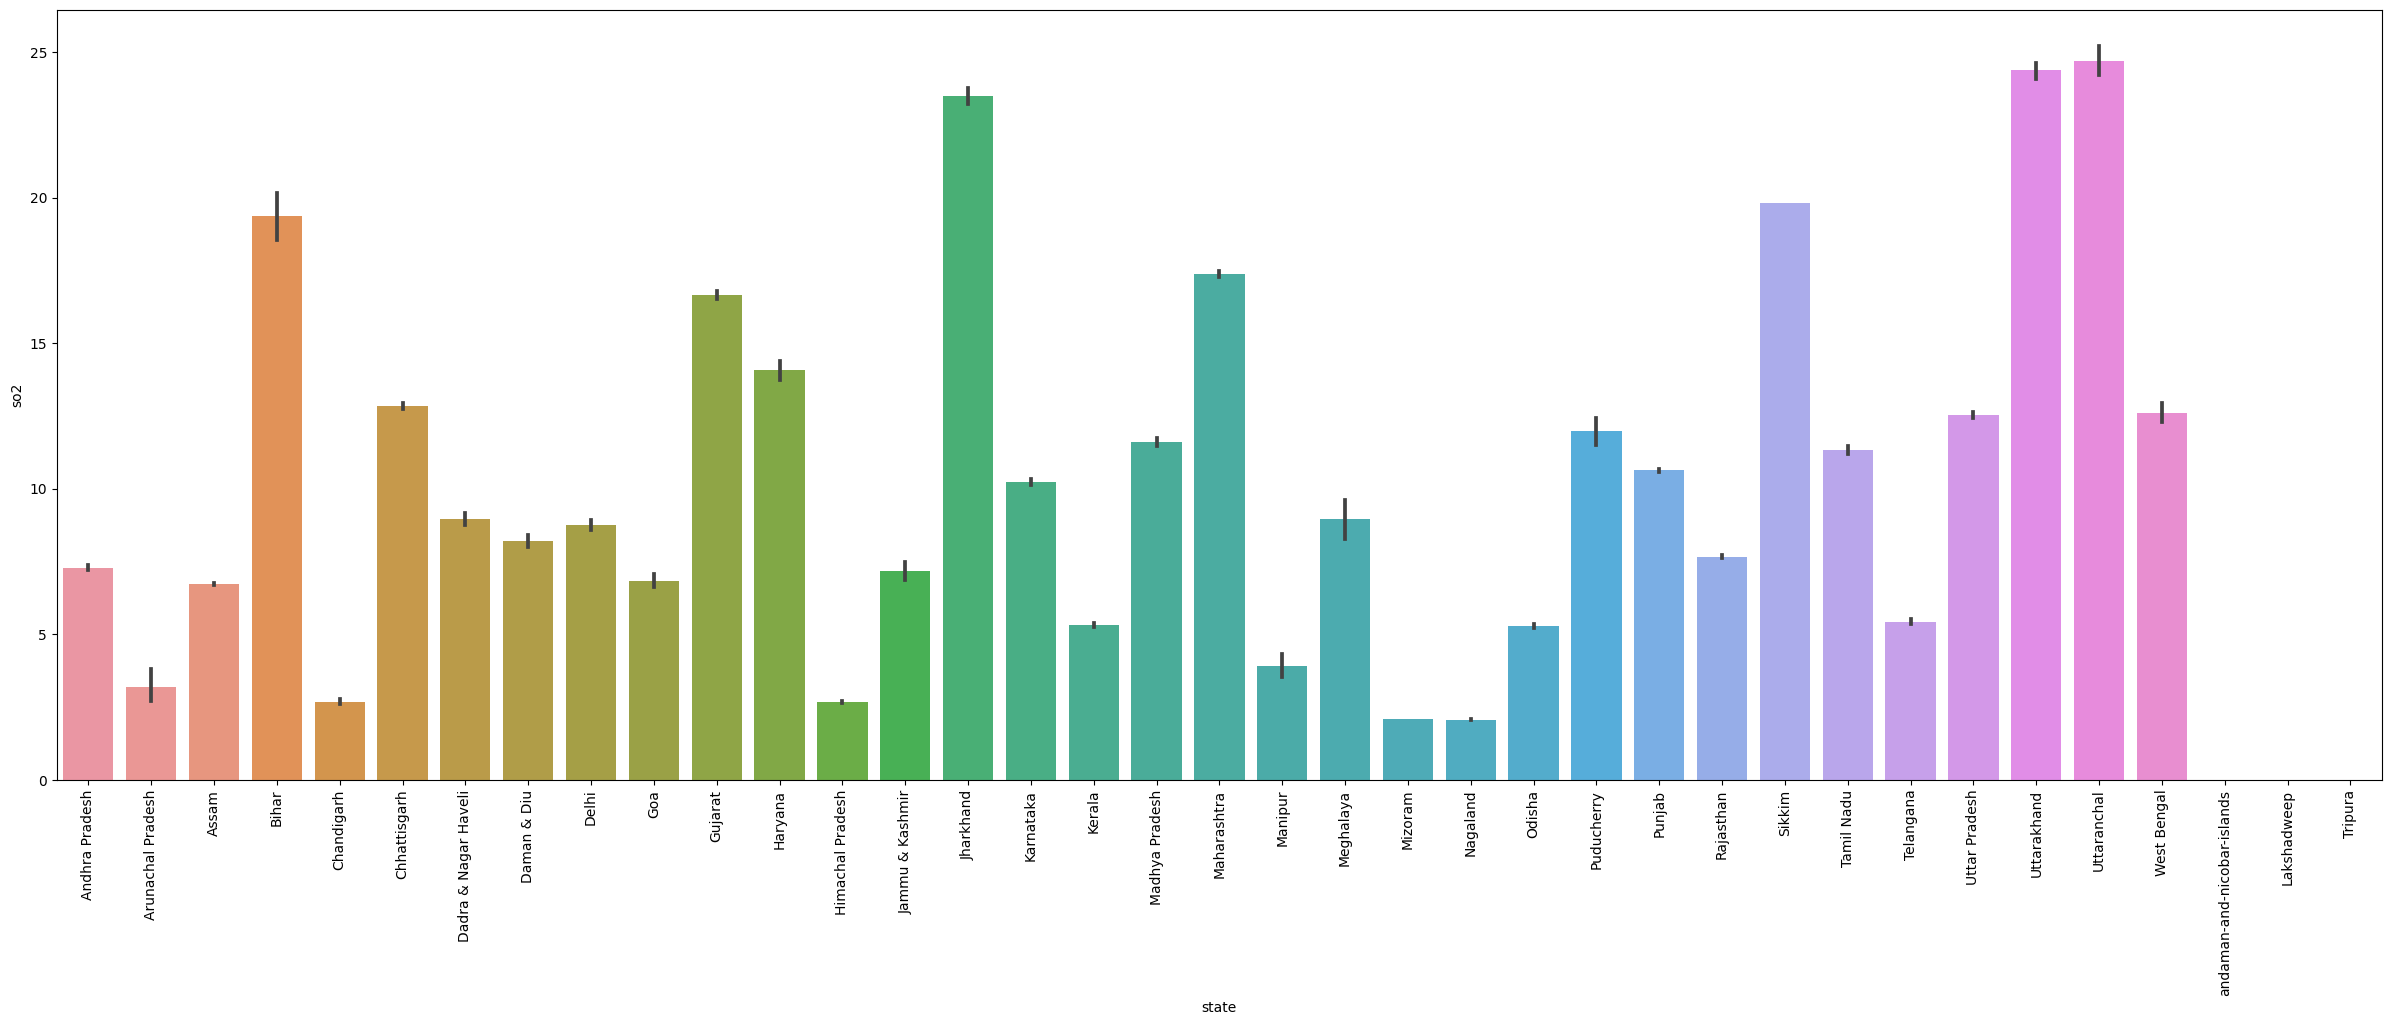

In [65]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [66]:
plt.rcParams['figure.figsize']=(30,10)

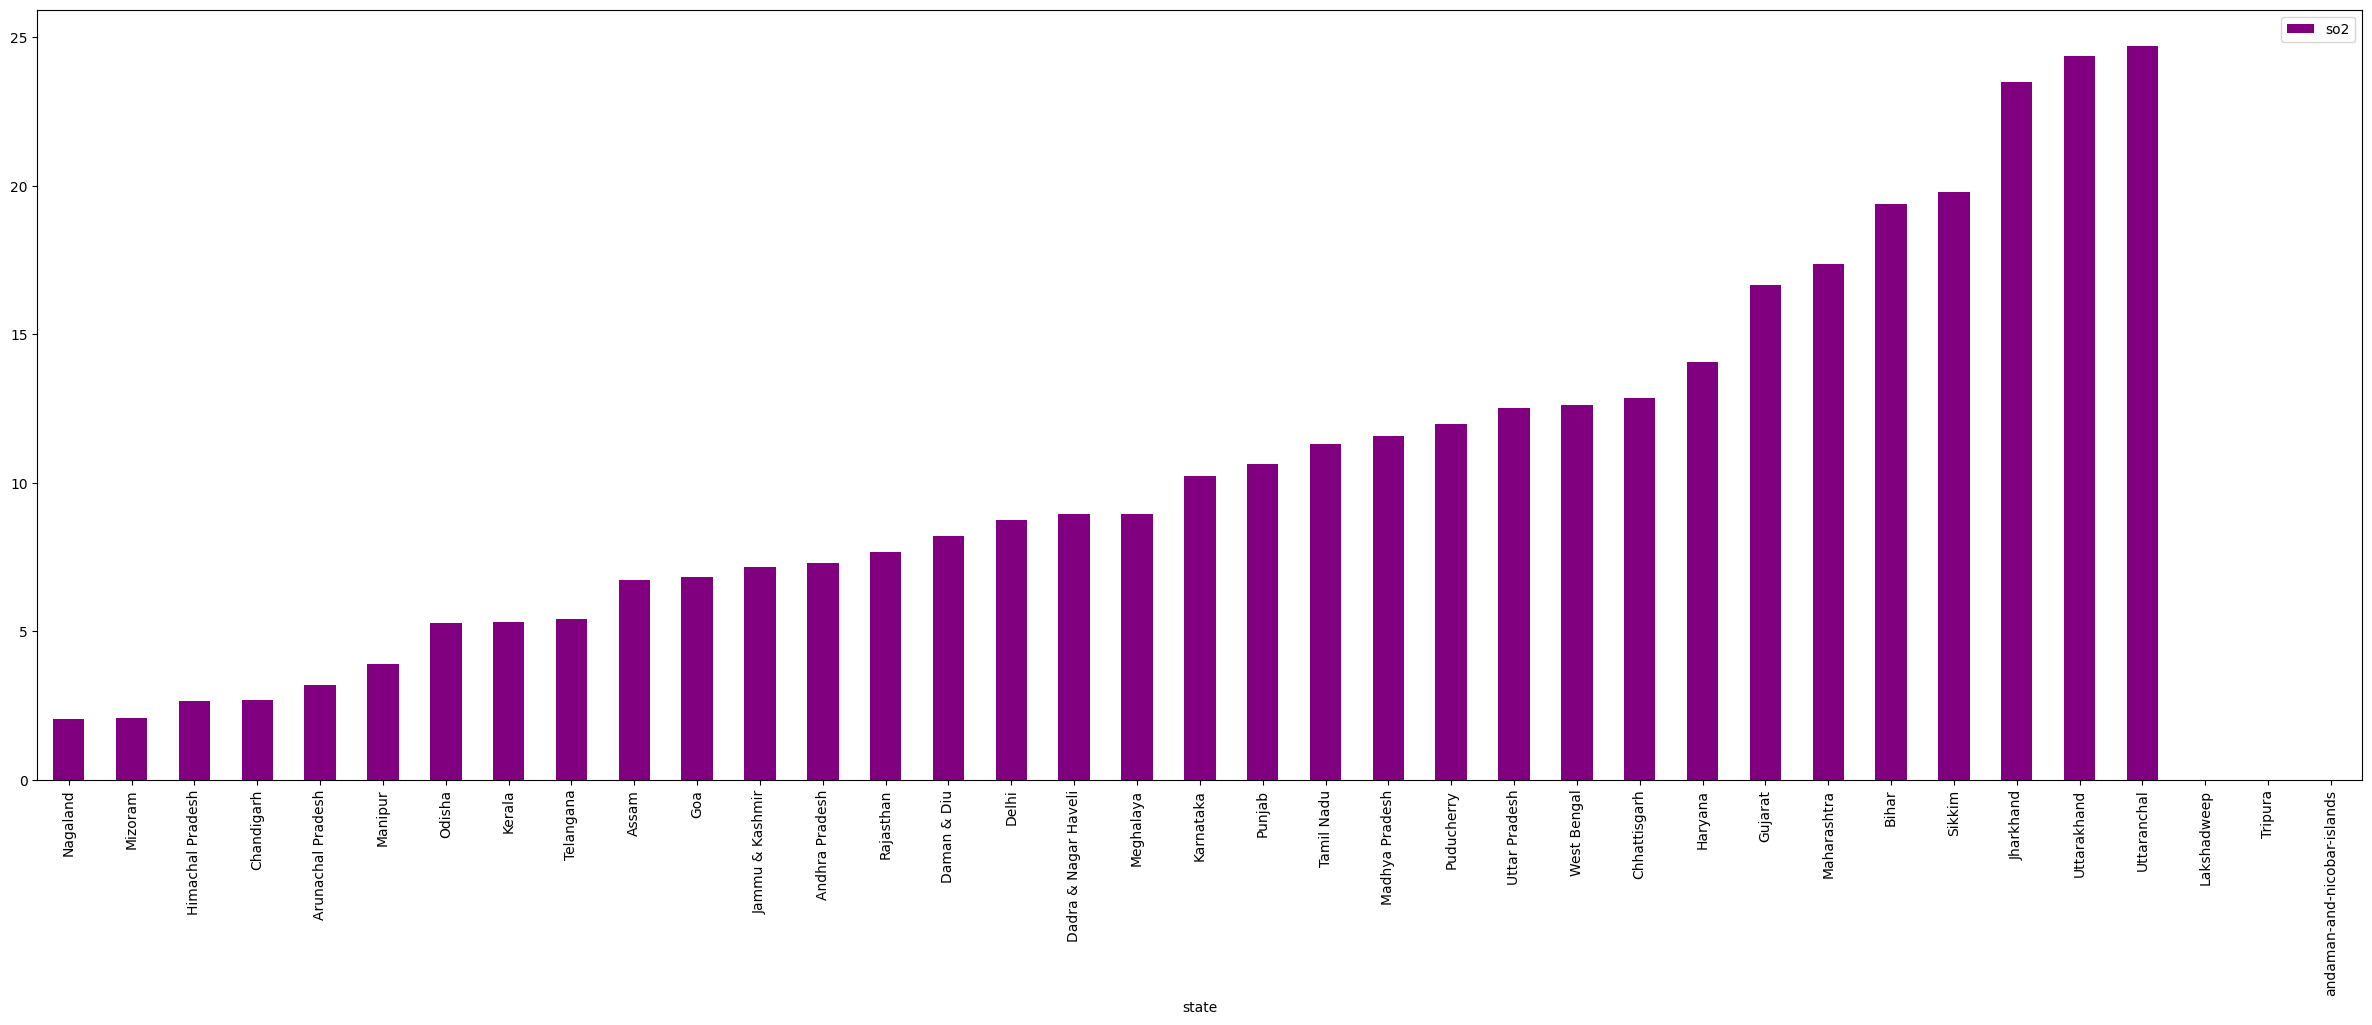

In [67]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

We get a clear picture of the states in an increasing order based on their so2 levels.

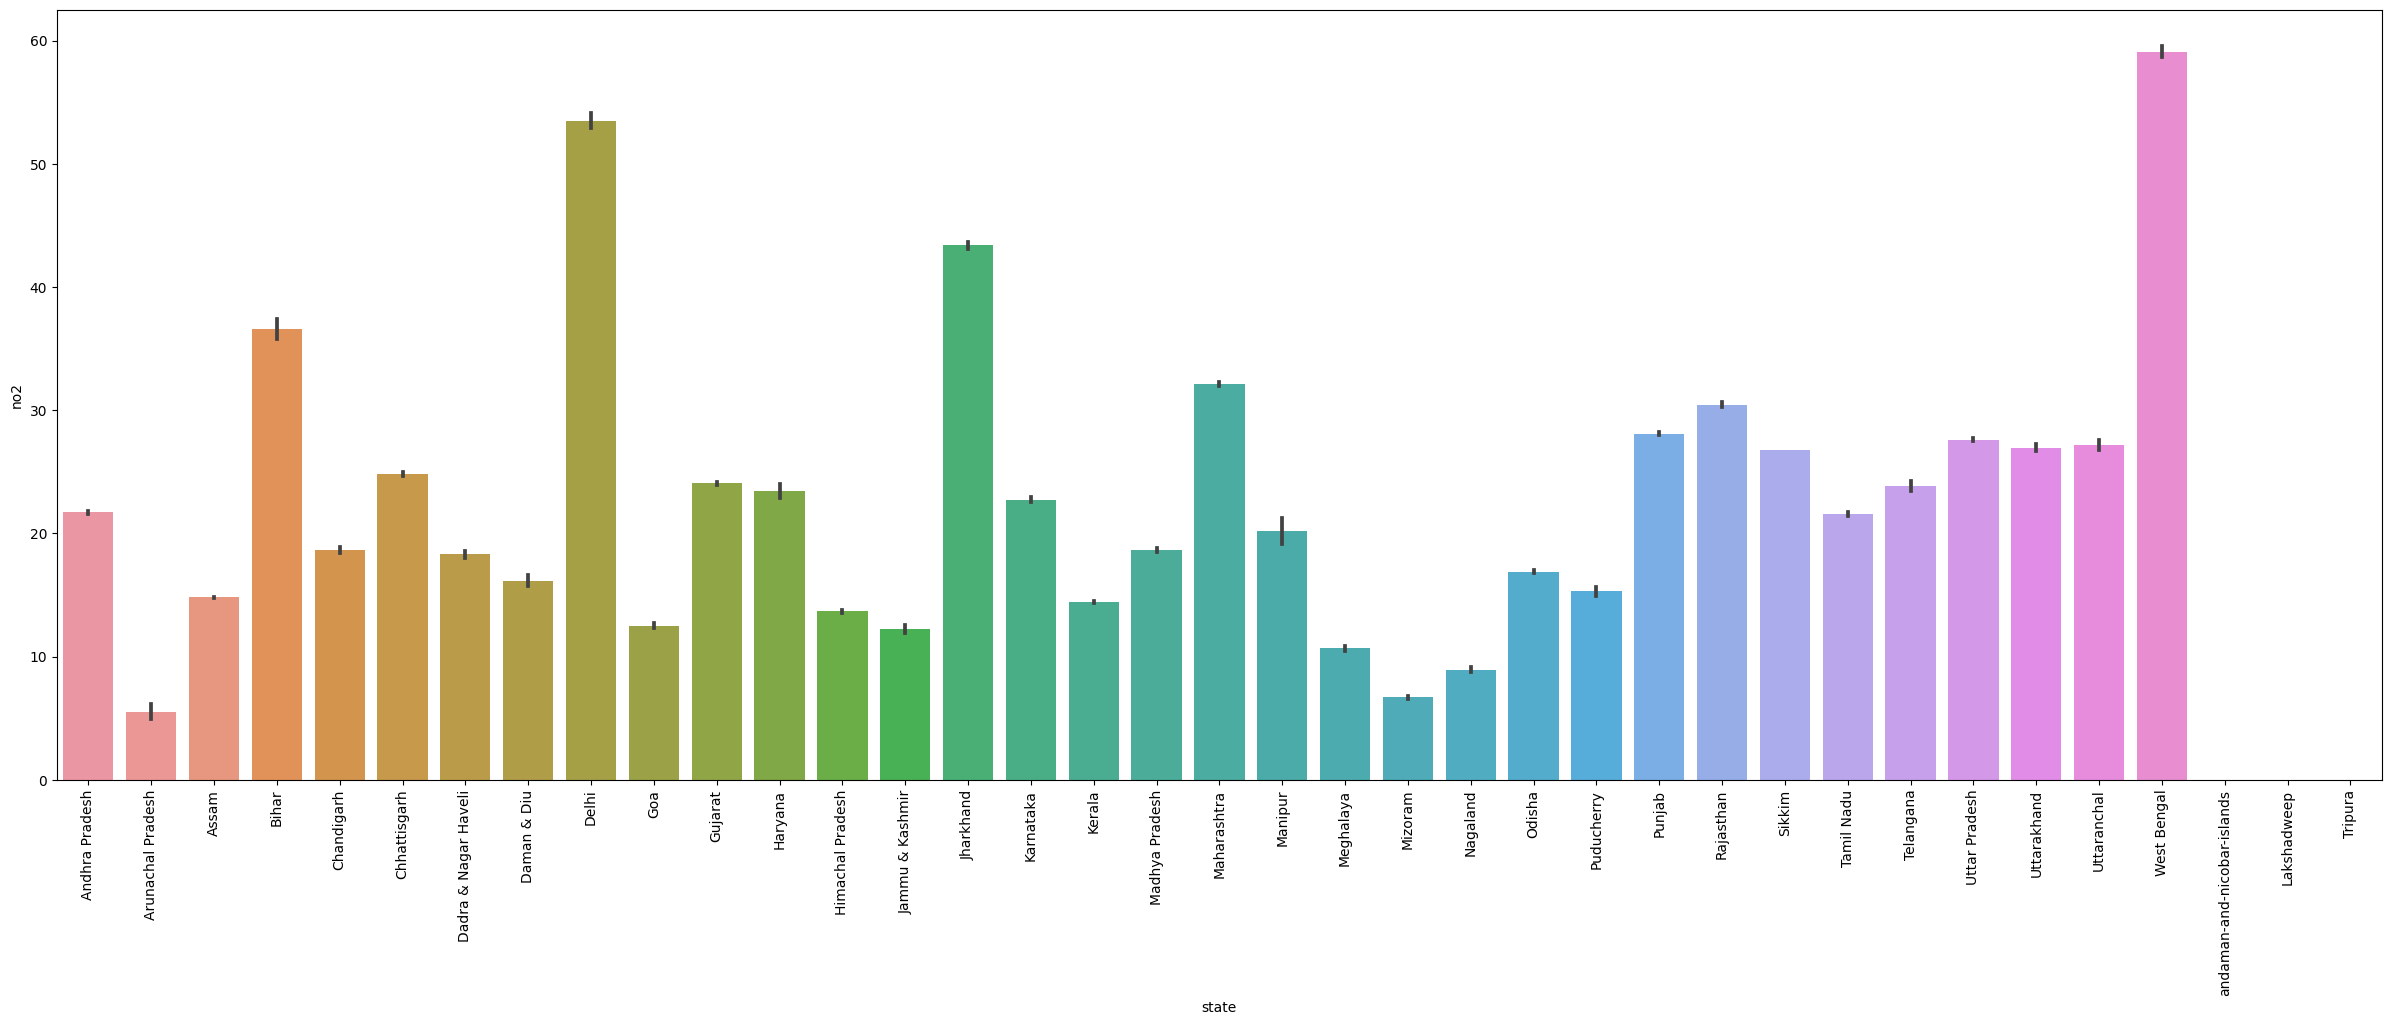

In [68]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

West bengal has a higher no2 level compared to other states 

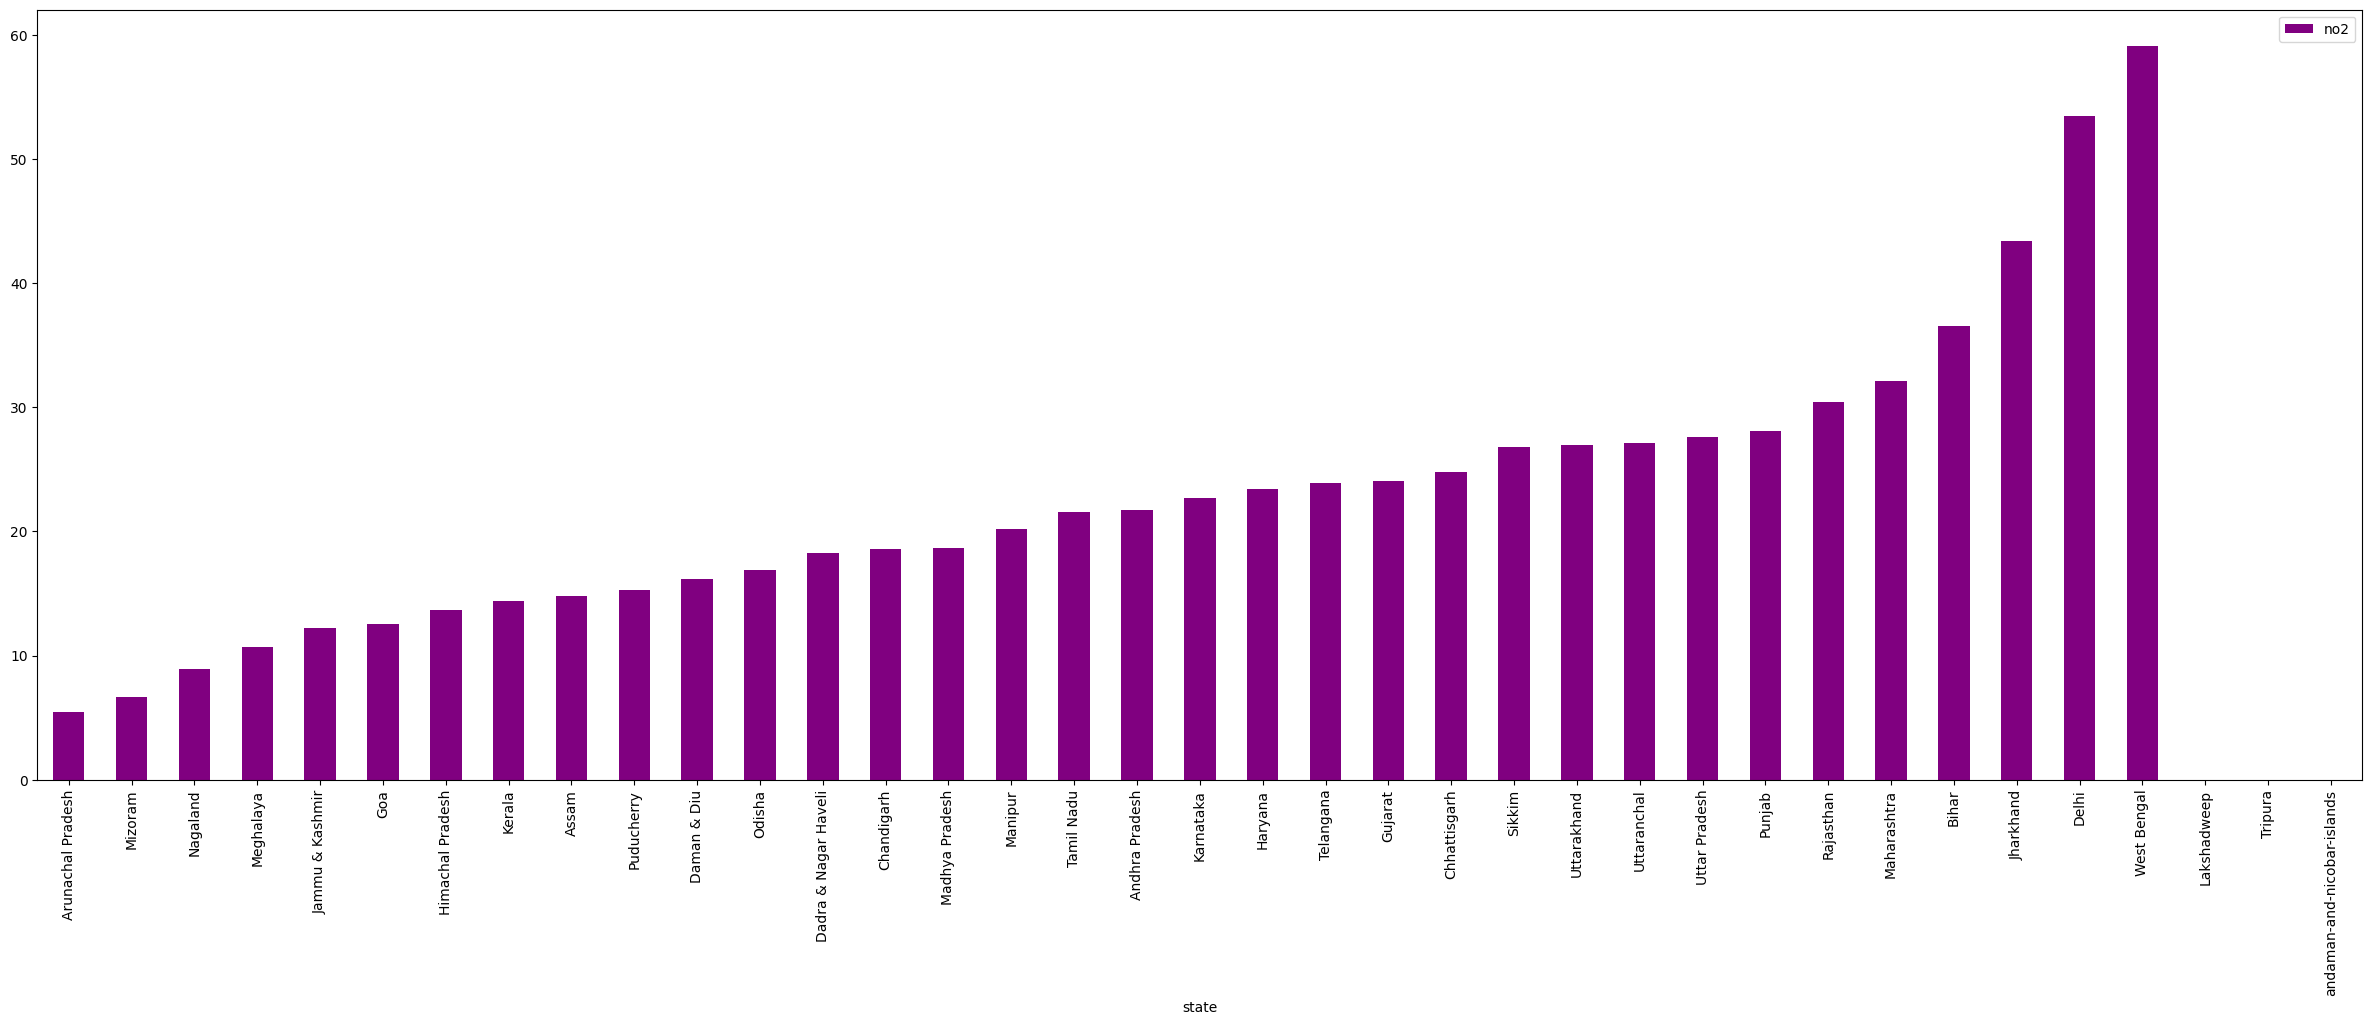

In [69]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

We get a clear picture of the states in an increasing order based on their no2 levels.

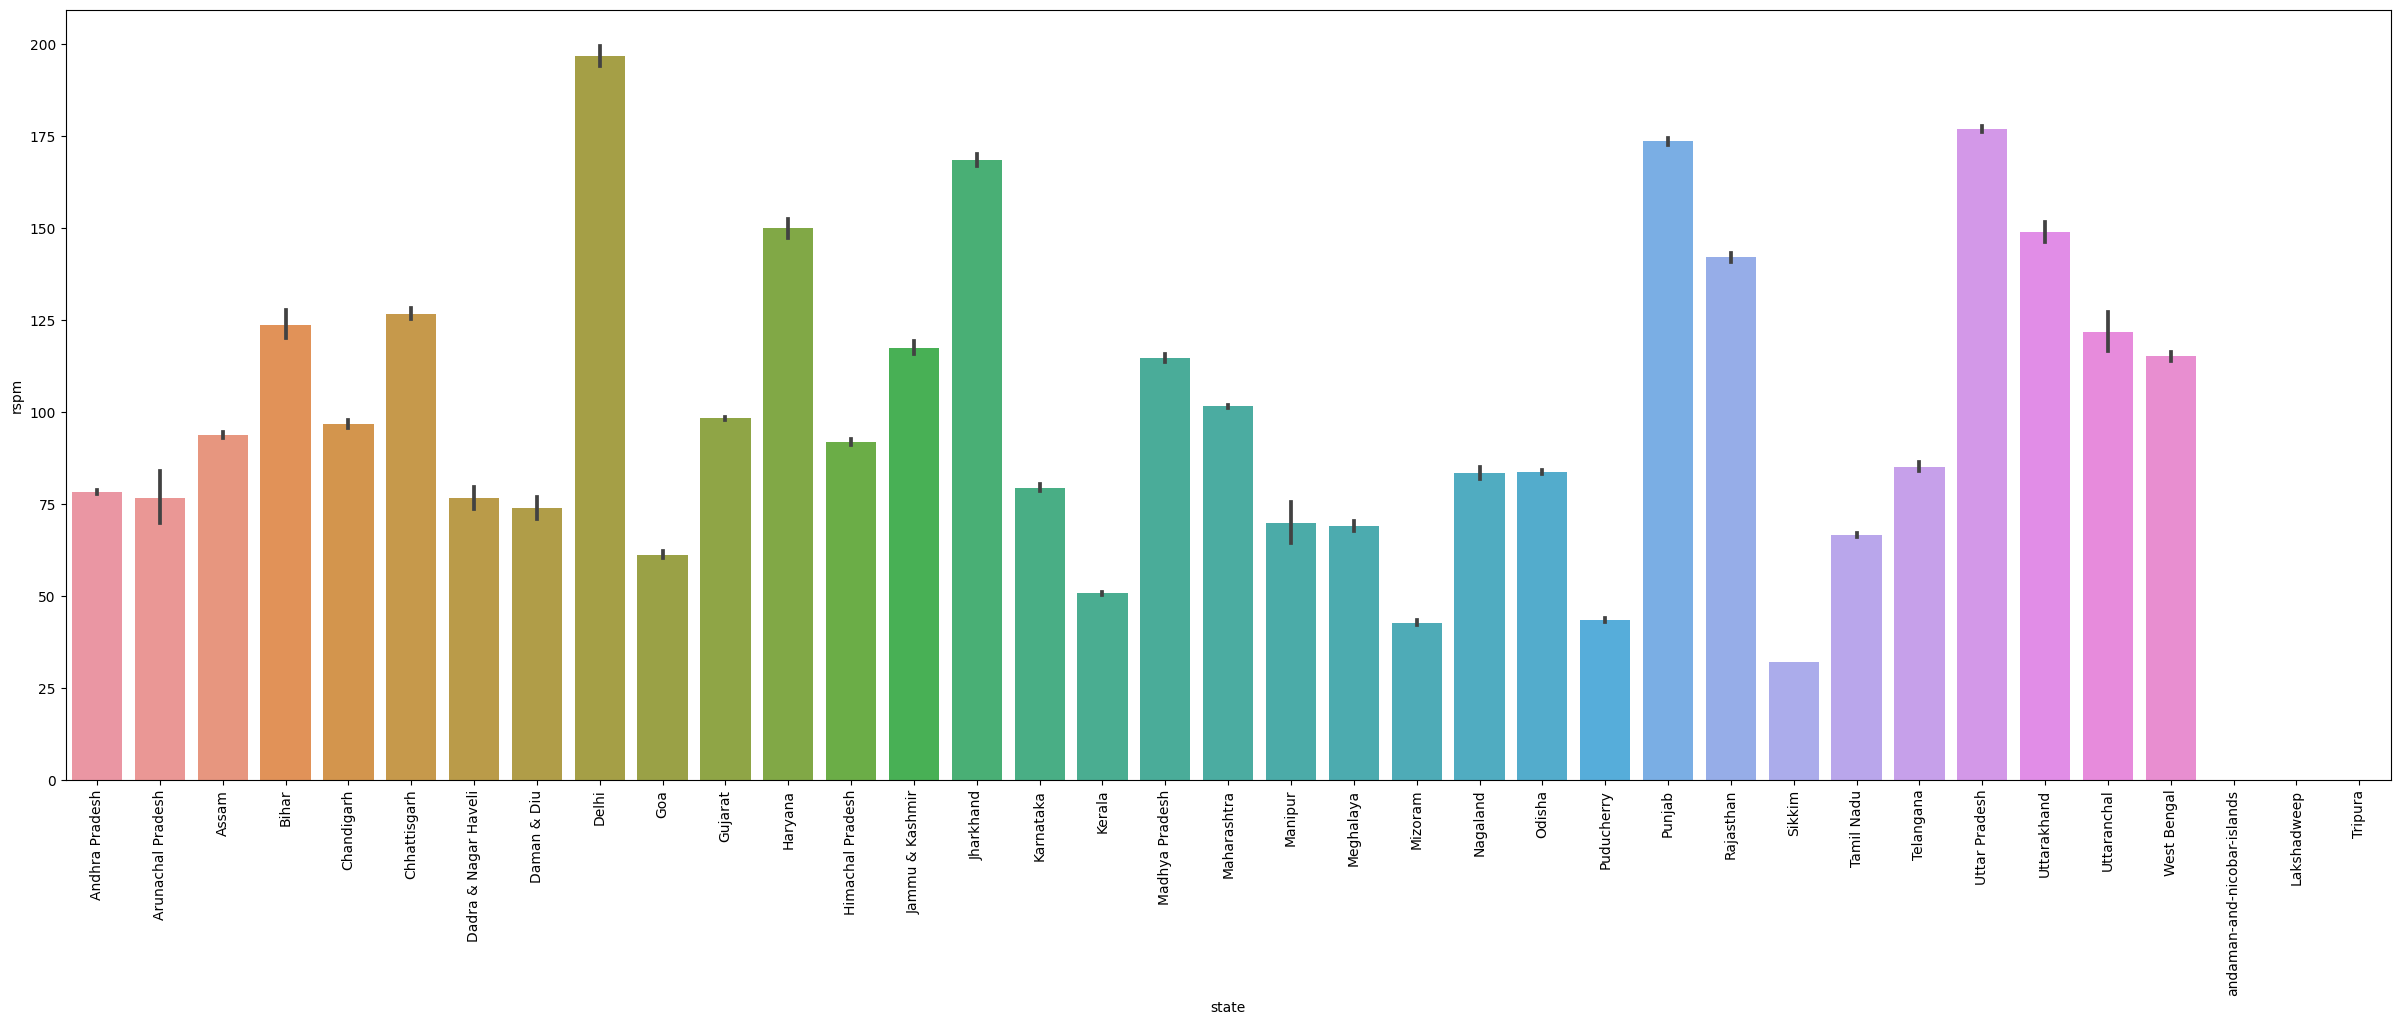

In [70]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

Delhi has higher rspm level compared to other states 

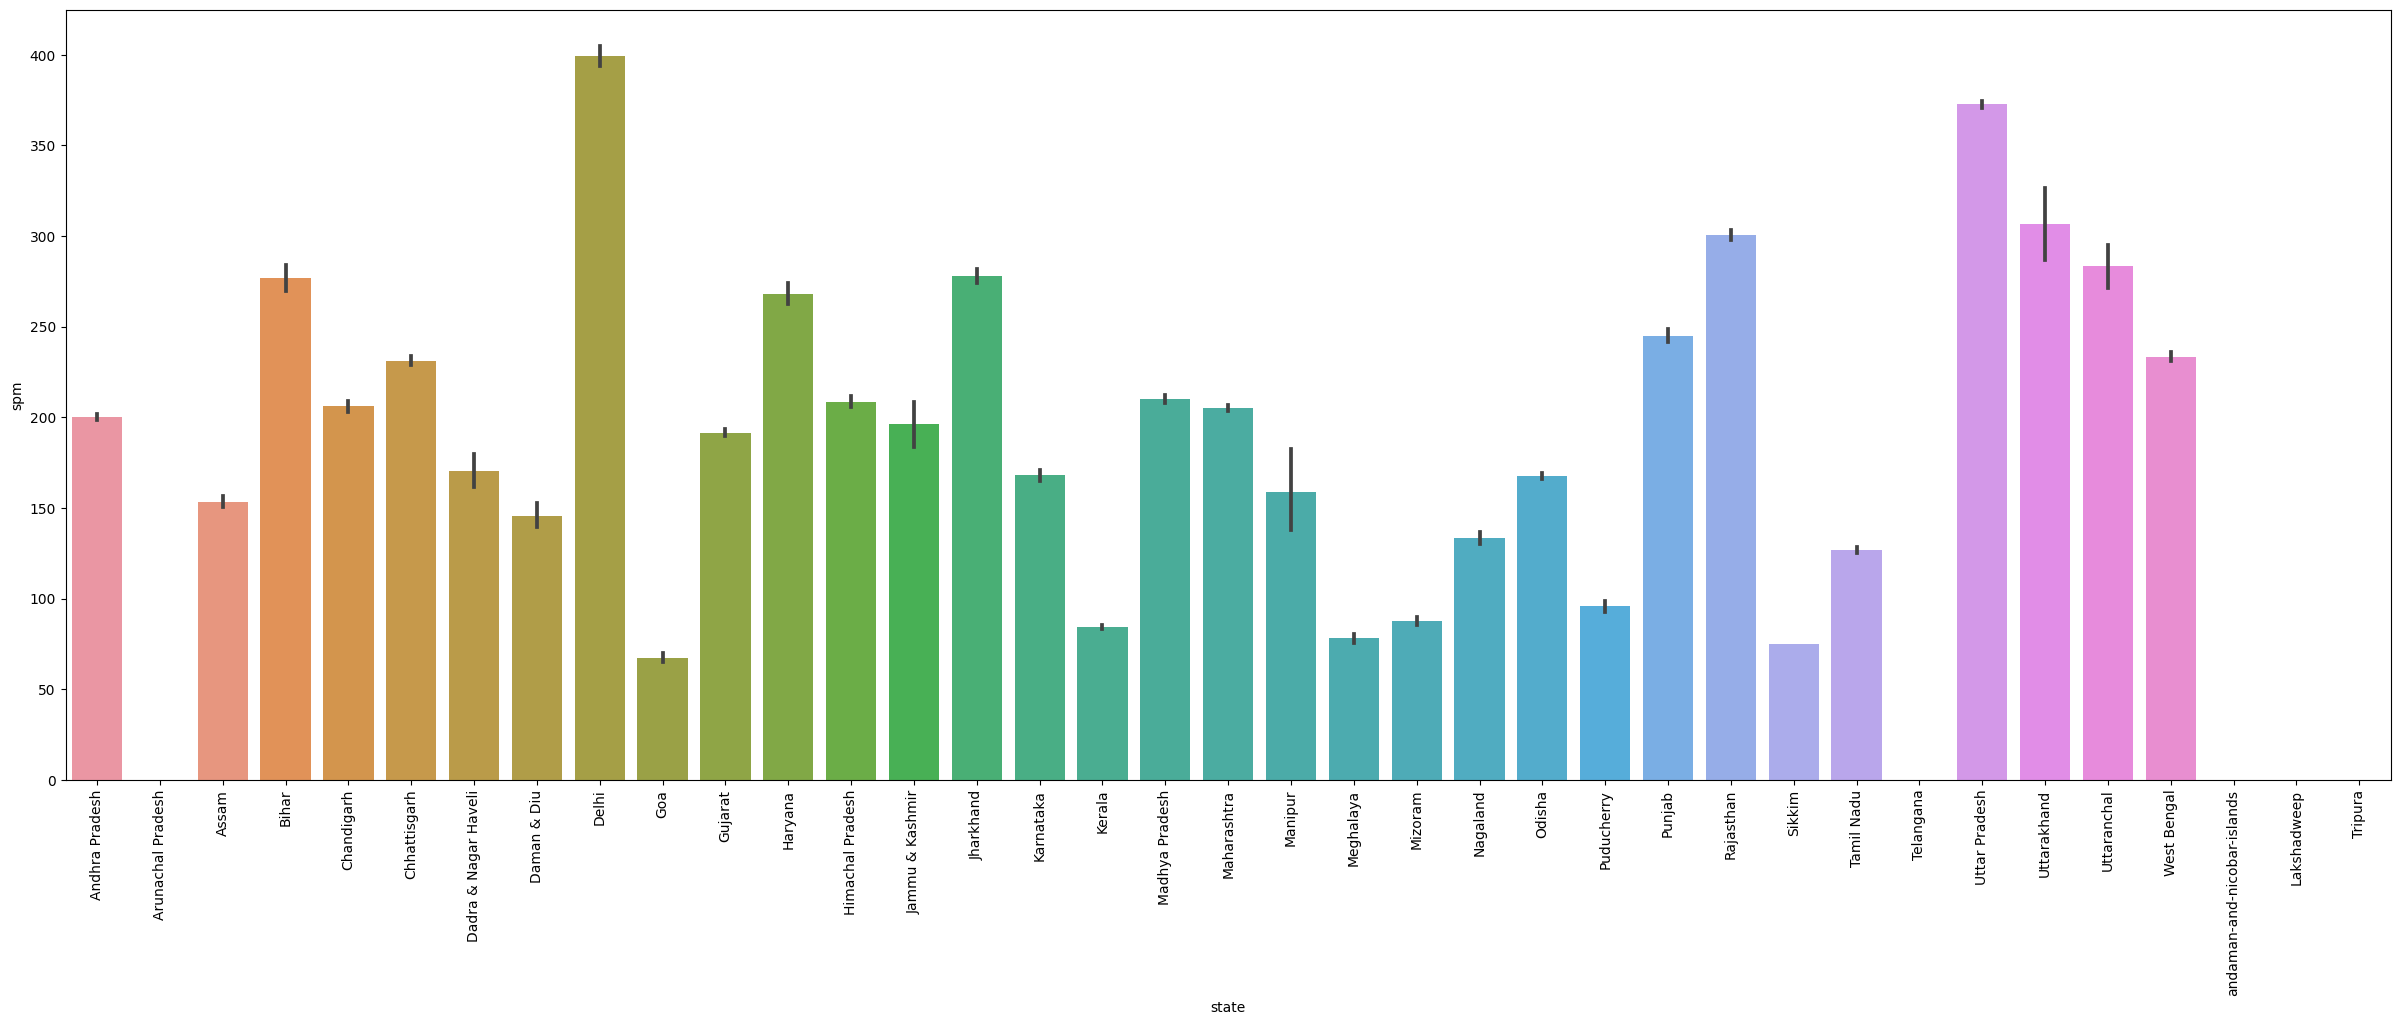

In [71]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

Delhi has higher spm level compared to other states 

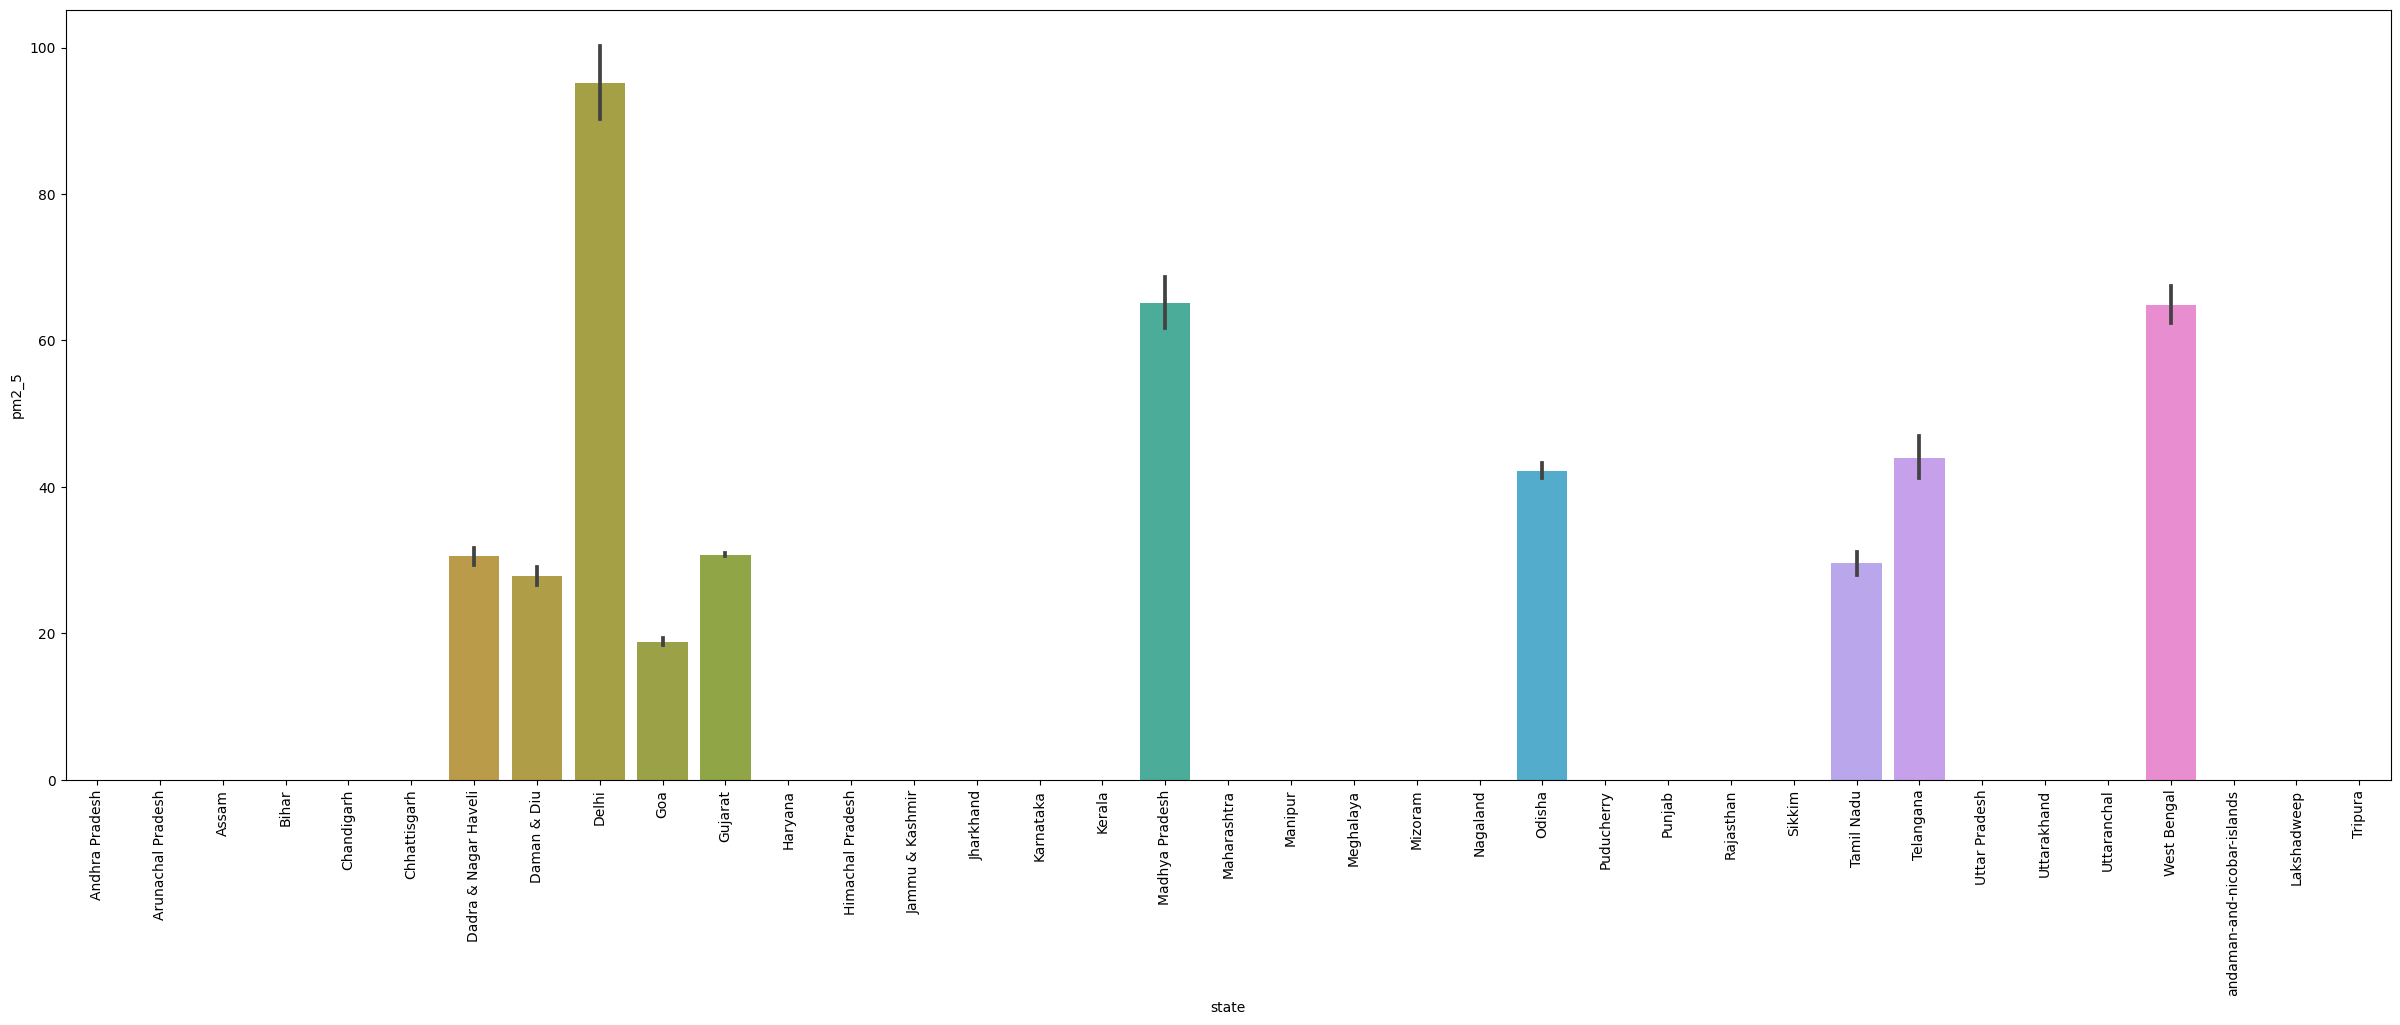

In [72]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

Delhi has higher pm2_5 level compared to other states 

### Checking all null values and treating those null values

In [73]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [74]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

Higher null values present in pm2_5 followed by spm

In [75]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [76]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [77]:
# Below are the percentages of null values present in the dataset
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [78]:
# Dropping unnecessary columns
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [79]:
# Now checking the null values
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [80]:
# Null value Imputation for categorical data
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [81]:
# null values are replaced with zeros for the numerical data
df.fillna(0, inplace=True)

In [82]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

Now we have successfully imputed null values which were present in the dataset

### CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

### Function to calculate so2 individual pollutant index(si)

In [83]:
# calculating the individual pollutant index for so2(sulphur dioxide)
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### Function to calculate no2 individual pollutant index(ni)

In [84]:
# calculating the individual pollutant index for no2(nitrogen dioxide)
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### Function to calculate rspm individual pollutant index(rpi)

In [85]:
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [86]:
# calculating the individual pollutant index for spm(suspended particulate matter)
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate the air quality index (AQI) of every data value

In [87]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [88]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

In [89]:
# These are the counts of values present in the AQI_Range column
df['AQI_Range'].value_counts()

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

### Splitting the dataset into Dependent and Independent columns
We only select columns like soi, noi, rpi, spmi

The AQI column is the target column

In [90]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [91]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [92]:
# splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


### Linear Regression

In [93]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [94]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [116]:
# Calculate Mean Squared Error for both sets
MSE_train = mean_squared_error(Y_train, train_pred)
MSE_test = mean_squared_error(Y_test, test_pred)

print("Mean Squared Error on Training Data:", MSE_train)
print("Mean Squared Error on Test Data:", MSE_test)

Mean Squared Error on Training Data: 185.3468910681126
Mean Squared Error on Test Data: 183.59529726105222


### Decision Tree Regressor

In [96]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [97]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [117]:
# Calculate Mean Squared Error
MSE_train_DT = mean_squared_error(Y_train, train_preds)
MSE_test_DT = mean_squared_error(Y_test, test_preds)

print("Mean Squared Error (MSE) for Training Data (Decision Tree): ", MSE_train_DT)
print("Mean Squared Error (MSE) for Test Data (Decision Tree): ", MSE_test_DT)

Mean Squared Error (MSE) for Training Data (Decision Tree):  5.308906076453251e-26
Mean Squared Error (MSE) for Test Data (Decision Tree):  1.9957715887297105


### Random Forest Regressor

In [99]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [100]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [118]:
# Calculate Mean Squared Error
MSE_train_RF = mean_squared_error(Y_train, train_preds1)
MSE_test_RF = mean_squared_error(Y_test, test_preds1)

print("MSE Training Data (Random Forest) = ", MSE_train_RF)
print("MSE Test Data (Random Forest) = ", MSE_test_RF)

MSE Training Data (Random Forest) =  0.17079496770568375
MSE Test Data (Random Forest) =  1.5451528858858707


In [ ]:
MSE_test_rf = mean_squared_error(Y_test, test_preds1)
print("MSE Test Data (Random Forest) = ", str(MSE_test_rf))

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [114]:
# Normalize/Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile and train
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10894/10894 [==============================] - 5s 428us/step - loss: 388.6352
Epoch 2/50
10894/10894 [==============================] - 5s 417us/step - loss: 3.6932
Epoch 3/50
10894/10894 [==============================] - 5s 425us/step - loss: 3.2971
Epoch 4/50
10894/10894 [==============================] - 5s 414us/step - loss: 3.0268
Epoch 5/50
10894/10894 [==============================] - 5s 433us/step - loss: 2.7908
Epoch 6/50
10894/10894 [==============================] - 5s 442us/step - loss: 2.6782
Epoch 7/50
10894/10894 [==============================] - 5s 438us/step - loss: 2.5457
Epoch 8/50
10894/10894 [==============================] - 5s 432us/step - loss: 2.3777
Epoch 9/50
10894/10894 [==============================] - 5s 435us/step - loss: 2.2422
Epoch 10/50
10894/10894 [==============================] - 4s 403us/step - loss: 2.1468
Epoch 11/50
10894/10894 [==============================] - 4s 405us/step - loss: 1.9914
Epoch 12/50
10894/10894 [==============

In [124]:
# Evaluate the model on test data
loss0 = model.evaluate(X_train_scaled, Y_train, verbose=0)
print(f"Mean Squared Error on Training Data: {loss0}")
loss = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

Mean Squared Error on Training Data: 0.7069955468177795
Mean Squared Error on Test Data: 0.5087568163871765


# Classification Algorithms

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [103]:
# Splitting the data into independent and dependent columns for classification 
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [104]:
# Splitting the data into training and testing data 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

### Logistic Regression

In [105]:
log_reg = LogisticRegression().fit(X_train2, Y_train2)

train_preds2 = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

test_preds2 = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.718456767634462
Model accuracy on test is:  0.7230719801718896
--------------------------------------------------
KappaScore is:  0.5750393534941016


In [106]:
log_reg.predict([[2,45.8,37,32]])

array(['Poor'], dtype=object)

### Decision Tree Classifier

In [107]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

train_preds3 = DT2.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

test_preds3 = DT2.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998508301873802
--------------------------------------------------
KappaScore is:  0.9997781298249673


### Random Forest Classifier

In [108]:
RF=RandomForestClassifier().fit(X_train2,Y_train2)
train_preds4 = RF.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

test_preds4 = RF.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9997934571825264
--------------------------------------------------
KappaScore is:  0.9996927973107813


### K-Nearest Neighbours

In [109]:
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
train_preds5 = KNN.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

test_preds5 = KNN.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9983705926395539
Model accuracy on test is:  0.9969133323388679
--------------------------------------------------
KappaScore is:  0.9954082566416549


In [110]:
# Predictions on random values
KNN.predict([[1,1.2,3.12,0]]) 

array(['Good'], dtype=object)

In [131]:
num_classes = 6

# Since Y contains categorical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y3 = label_encoder.fit_transform(Y2)

# Convert target variable to categorical (assuming Y contains integers representing classes)
from keras.utils import to_categorical
Y3 = to_categorical(Y3, num_classes=num_classes)

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X2, Y3, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# output layer for classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled3, Y_train3, epochs=50, batch_size=32, validation_data=(X_test_scaled3, Y_test3))



Epoch 1/50
10894/10894 [==============================] - 6s 538us/step - loss: 0.0905 - accuracy: 0.9723 - val_loss: 0.0350 - val_accuracy: 0.9901
Epoch 2/50
10894/10894 [==============================] - 6s 540us/step - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.0307 - val_accuracy: 0.9873
Epoch 3/50
10894/10894 [==============================] - 6s 524us/step - loss: 0.0267 - accuracy: 0.9900 - val_loss: 0.0180 - val_accuracy: 0.9947
Epoch 4/50
10894/10894 [==============================] - 6s 524us/step - loss: 0.0242 - accuracy: 0.9907 - val_loss: 0.0193 - val_accuracy: 0.9921
Epoch 5/50
10894/10894 [==============================] - 6s 549us/step - loss: 0.0222 - accuracy: 0.9915 - val_loss: 0.0260 - val_accuracy: 0.9908
Epoch 6/50
10894/10894 [==============================] - 6s 514us/step - loss: 0.0213 - accuracy: 0.9917 - val_loss: 0.0213 - val_accuracy: 0.9907
Epoch 7/50
10894/10894 [==============================] - 6s 541us/step - loss: 0.0209 - accuracy: 0.9918 - val_

In [133]:
from sklearn.metrics import cohen_kappa_score

# Calculate accuracy for train data
train_predictions = model.predict(X_train_scaled3)
train_acc = accuracy_score(Y_train3.argmax(axis=1), train_predictions.argmax(axis=1))
# Calculate accuracy for test data
test_predictions = model.predict(X_test_scaled3)
test_acc = accuracy_score(Y_test3.argmax(axis=1), test_predictions.argmax(axis=1))

print(f"Model accuracy on train: {train_acc}")
print(f"Model accuracy on test: {test_acc}")
print('-'*50)

# Calculate Kappa Score
test_kappa = cohen_kappa_score(Y_test3.argmax(axis=1), test_predictions.argmax(axis=1))
print(f"KappaScore on test: {test_kappa}")

2724/2724 [==============================] - 1s 292us/step
Model accuracy on train: 0.9970510021715869
Model accuracy on test: 0.9966953149204236
--------------------------------------------------
KappaScore on test: 0.9950837452960384
